In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./inputs/solution_60.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    
    
run_params = Struct(**run_params)
params = Struct(**params)

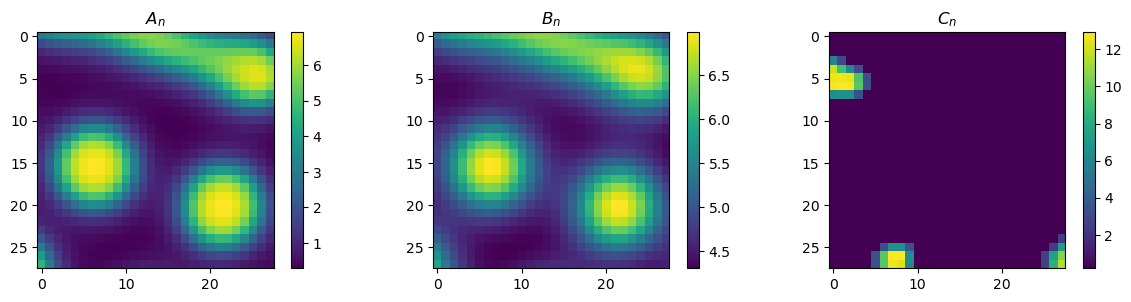

In [4]:
A_n = solution[-1, 0, :, :]
B_n = solution[-1, 1, :, :]
C_n = solution[-1, 2, :, :]

#############################################################
#    Inner boundaries
# By using these slices, we can remove the boundary effects
# or select a smaller portion of the domain
#
#   Important: slices must not be larger than slices(1,-1,1).
#              Otherwise, the boundary effects of finit difference
#              Laplacian cannot be removed
#
x_slice = slice(50,-50, 1)
y_slice = slice(50,-50, 1)

to = create_to(A_n[x_slice,y_slice])
########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


A_n = ndimage.convolve(A_n, kernel)/4
B_n = ndimage.convolve(B_n, kernel)/4
C_n = ndimage.convolve(C_n, kernel)/4
############################################################
plot_n_im([A_n[x_slice,y_slice], 
           B_n[x_slice,y_slice], 
           C_n[x_slice,y_slice]], 
          [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

In [5]:
A_min, A_max = np.min(A_n), np.max(A_n)
B_min, B_max = np.min(B_n), np.max(B_n)
C_min, C_max = np.min(C_n), np.max(C_n)
n = params["n"]
tol = .005

def define_bound(tol, n, x_min, x_max):
    upper = ((1-tol)/tol)**(1/n)
    lower = (tol/(1-tol))**(1/n)
    # return (lower, upper) bounds and the initial guess
    return (max(0,x_min*lower), x_max*upper), max(0, (x_max*upper-max(0,x_min*lower))/2)
    
K_AA_bound, K_AA_init =  define_bound(tol, n, A_min, A_max)
K_AB_bound, K_AB_init =  define_bound(tol, n, A_min, A_max)
K_AC_bound, K_AC_init =  define_bound(tol, n, A_min, A_max)
K_BA_bound, K_BA_init =  define_bound(tol, n, B_min, B_max)
K_BC_bound, K_BC_init =  define_bound(tol, n, B_min, B_max)
K_CB_bound, K_CB_init =  define_bound(tol, n, C_min, C_max)
K_CC_bound, K_CC_init =  define_bound(tol, n, C_min, C_max)

Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (0, None)
    return Ks_bounds[name]


Epoch: 1 
 data loss:10.491618, 
data A loss:3.276086, data B loss:5.194270, data C loss:2.021263, 
Laplacian A loss:68.652679, Laplacian B loss:21.568694
Physics loss:1.750050
Negative loss:0.134072

 b_A=0.9000, b_B=0.9000, b_C=0.9000, V_A=1.0000, V_B=1.0000, V_C=1.0000, mu_A=0.9000, mu_B=1.0999, K_AA=13.1749, K_AB=13.1749, K_AC=13.1749, K_BA=12.8184, K_BC=12.8184, K_CB=26.7500, K_CC=26.7500


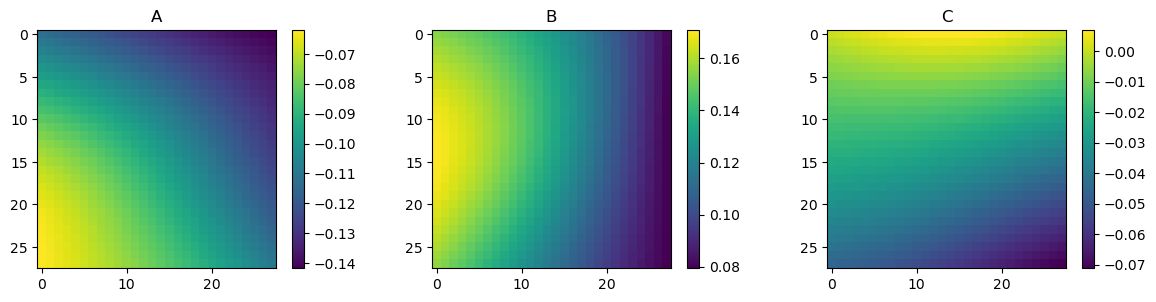

Epoch: 1000 
 data loss:1.871199, 
data A loss:0.486398, data B loss:0.789911, data C loss:0.594890, 
Laplacian A loss:7.504941, Laplacian B loss:16.738123
Physics loss:8.038276
Negative loss:0.114833

 b_A=-0.0394, b_B=-0.3252, b_C=0.1265, V_A=5.2323, V_B=20.6967, V_C=5.0302, mu_A=0.4358, mu_B=0.3111, K_AA=4.0213, K_AB=3.8751, K_AC=13.8667, K_BA=9.1029, K_BC=13.1432, K_CB=26.4813, K_CC=4.7701


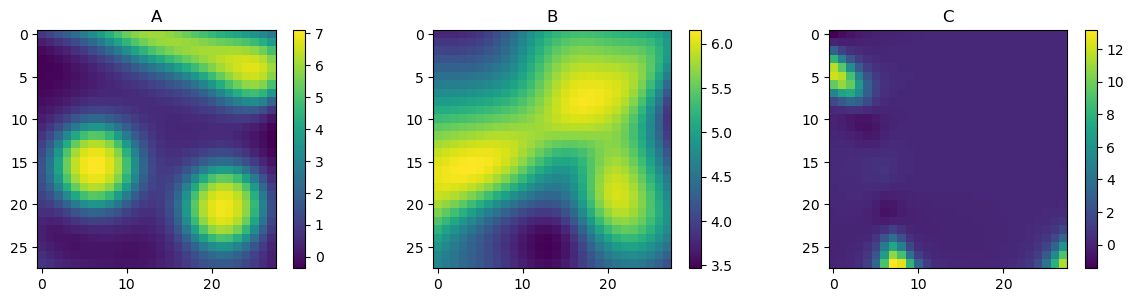

Epoch: 2000 
 data loss:0.563954, 
data A loss:0.137268, data B loss:0.101084, data C loss:0.325601, 
Laplacian A loss:1.044459, Laplacian B loss:1.752584
Physics loss:1.774195
Negative loss:0.049445

 b_A=-0.0264, b_B=-0.0060, b_C=0.1244, V_A=11.5640, V_B=93.3400, V_C=11.0310, mu_A=0.4385, mu_B=2.7780, K_AA=4.6633, K_AB=5.0276, K_AC=13.9020, K_BA=6.2933, K_BC=4.4883, K_CB=26.7805, K_CC=5.6070


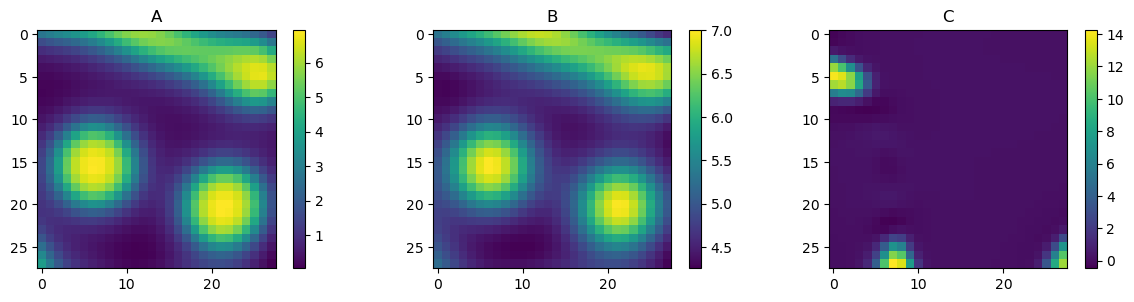

Epoch: 3000 
 data loss:0.366474, 
data A loss:0.097748, data B loss:0.047443, data C loss:0.221283, 
Laplacian A loss:0.573711, Laplacian B loss:0.862471
Physics loss:1.181824
Negative loss:0.029585

 b_A=-0.0337, b_B=0.1296, b_C=0.1232, V_A=15.8907, V_B=92.5824, V_C=9.6378, mu_A=0.4445, mu_B=2.8352, K_AA=4.8247, K_AB=4.9697, K_AC=13.9091, K_BA=5.5948, K_BC=4.9020, K_CB=27.1196, K_CC=5.6189


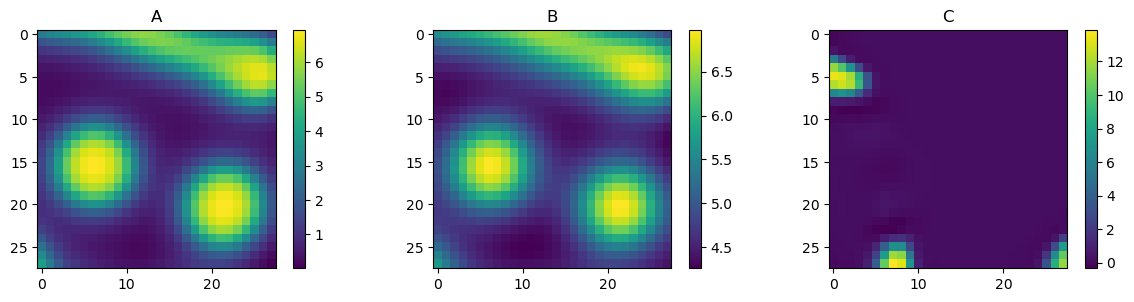

Epoch: 4000 
 data loss:0.249447, 
data A loss:0.077222, data B loss:0.036993, data C loss:0.135232, 
Laplacian A loss:0.376281, Laplacian B loss:0.468708
Physics loss:0.937961
Negative loss:0.012026

 b_A=-0.0436, b_B=1.3779, b_C=0.1233, V_A=18.1900, V_B=92.7552, V_C=10.0014, mu_A=0.4446, mu_B=3.0992, K_AA=4.8802, K_AB=4.9452, K_AC=13.9143, K_BA=5.3440, K_BC=4.7783, K_CB=27.4158, K_CC=5.5690


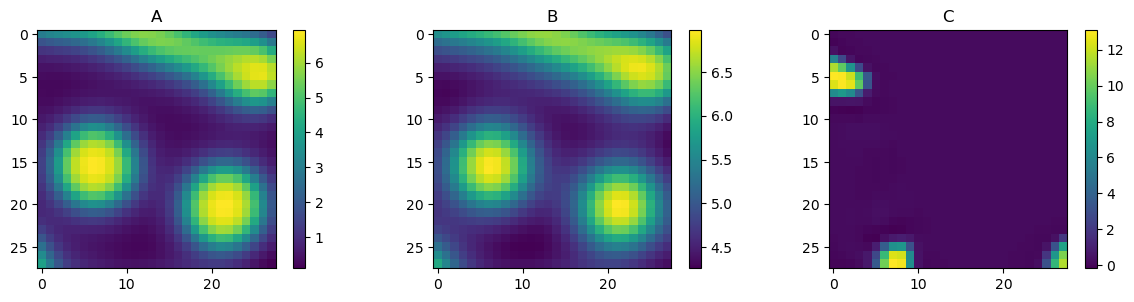

Epoch: 5000 
 data loss:0.182847, 
data A loss:0.063392, data B loss:0.030156, data C loss:0.089299, 
Laplacian A loss:0.278093, Laplacian B loss:0.298626
Physics loss:0.789659
Negative loss:0.002096

 b_A=-0.0595, b_B=2.4337, b_C=0.1229, V_A=19.8839, V_B=93.1461, V_C=11.2299, mu_A=0.4486, mu_B=3.3304, K_AA=4.9210, K_AB=4.9370, K_AC=13.9198, K_BA=5.1892, K_BC=4.4804, K_CB=27.6386, K_CC=5.6008


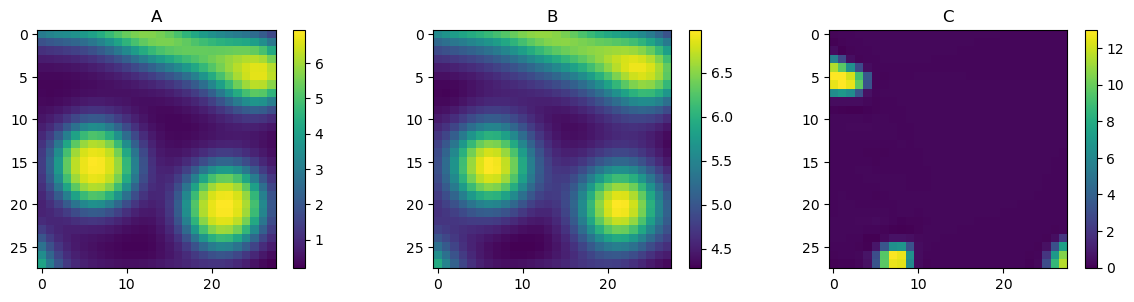

Epoch: 6000 
 data loss:0.148406, 
data A loss:0.052340, data B loss:0.027432, data C loss:0.068635, 
Laplacian A loss:0.270034, Laplacian B loss:0.239987
Physics loss:0.801949
Negative loss:0.000049

 b_A=-0.0457, b_B=3.0070, b_C=0.1273, V_A=21.1703, V_B=93.4189, V_C=11.6426, mu_A=0.4337, mu_B=3.4363, K_AA=4.9335, K_AB=4.9188, K_AC=13.9269, K_BA=5.1032, K_BC=4.4231, K_CB=27.8440, K_CC=5.6352


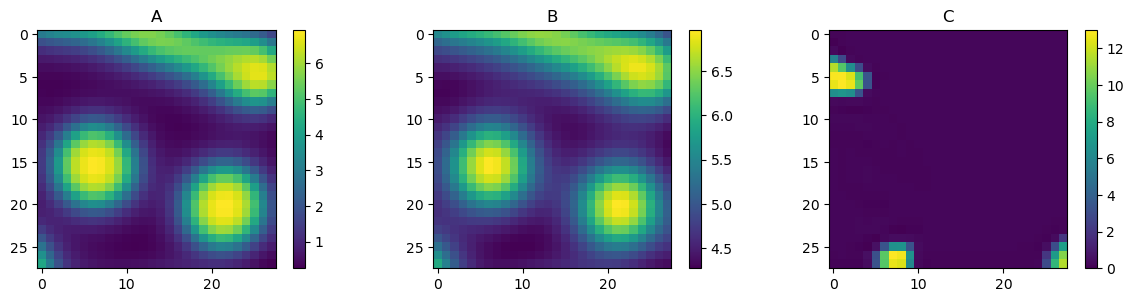

Epoch: 7000 
 data loss:0.116761, 
data A loss:0.043664, data B loss:0.019906, data C loss:0.053191, 
Laplacian A loss:0.180400, Laplacian B loss:0.181094
Physics loss:0.671636
Negative loss:0.000000

 b_A=-0.0611, b_B=3.3038, b_C=0.1236, V_A=22.0827, V_B=93.5517, V_C=11.3946, mu_A=0.4449, mu_B=3.5117, K_AA=4.9556, K_AB=4.9250, K_AC=13.9357, K_BA=5.0284, K_BC=4.4686, K_CB=28.0005, K_CC=5.6848


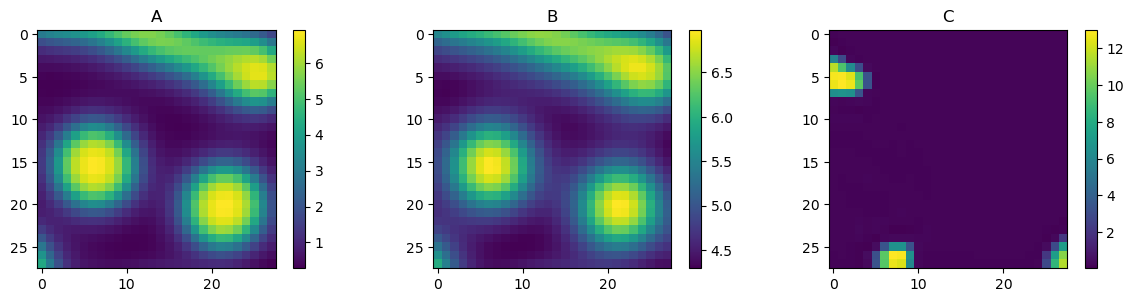

Epoch: 8000 
 data loss:0.093699, 
data A loss:0.037294, data B loss:0.016656, data C loss:0.039749, 
Laplacian A loss:0.156388, Laplacian B loss:0.148725
Physics loss:0.645718
Negative loss:0.000000

 b_A=-0.0631, b_B=3.5024, b_C=0.1240, V_A=22.7488, V_B=93.6414, V_C=10.8640, mu_A=0.4455, mu_B=3.5543, K_AA=4.9665, K_AB=4.9230, K_AC=13.9453, K_BA=4.9822, K_BC=4.5958, K_CB=28.1207, K_CC=5.7306


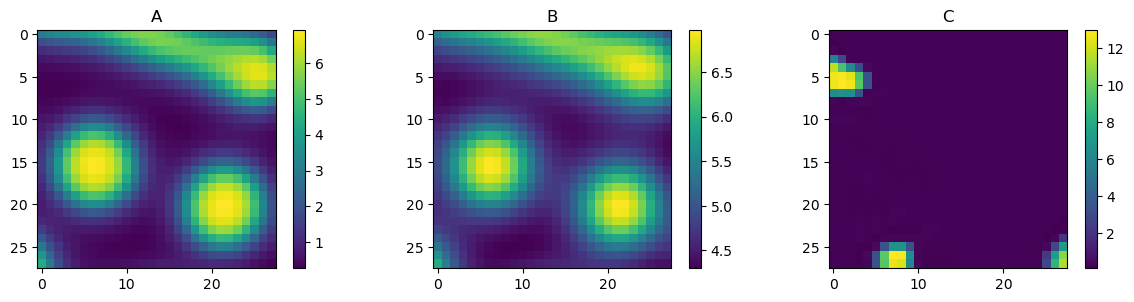

Epoch: 9000 
 data loss:0.076253, 
data A loss:0.033001, data B loss:0.014464, data C loss:0.028788, 
Laplacian A loss:0.142730, Laplacian B loss:0.125660
Physics loss:0.623254
Negative loss:0.000000

 b_A=-0.0614, b_B=3.6329, b_C=0.1235, V_A=23.2243, V_B=93.7046, V_C=10.4338, mu_A=0.4453, mu_B=3.5814, K_AA=4.9729, K_AB=4.9212, K_AC=13.9557, K_BA=4.9516, K_BC=4.7121, K_CB=28.2142, K_CC=5.7667


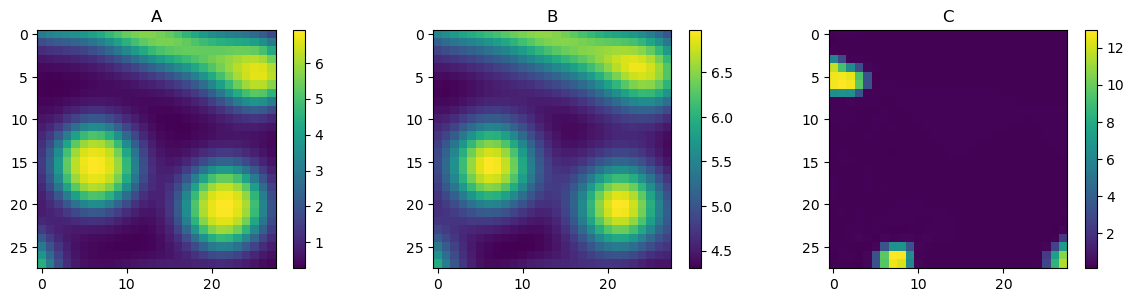

Epoch: 10000 
 data loss:0.064047, 
data A loss:0.030457, data B loss:0.013057, data C loss:0.020533, 
Laplacian A loss:0.148532, Laplacian B loss:0.109329
Physics loss:0.614101
Negative loss:0.000000

 b_A=-0.0614, b_B=3.7177, b_C=0.1239, V_A=23.5809, V_B=93.7514, V_C=10.2796, mu_A=0.4446, mu_B=3.5982, K_AA=4.9777, K_AB=4.9195, K_AC=13.9662, K_BA=4.9299, K_BC=4.7606, K_CB=28.2934, K_CC=5.7879


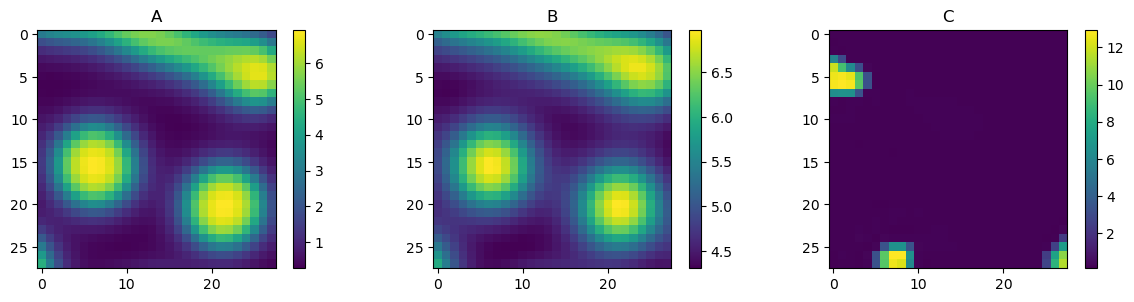

Epoch: 11000 
 data loss:0.055793, 
data A loss:0.028706, data B loss:0.011954, data C loss:0.015133, 
Laplacian A loss:0.113796, Laplacian B loss:0.096545
Physics loss:0.603750
Negative loss:0.000000

 b_A=-0.0623, b_B=3.7604, b_C=0.1237, V_A=23.8301, V_B=93.7803, V_C=10.2038, mu_A=0.4455, mu_B=3.6091, K_AA=4.9842, K_AB=4.9207, K_AC=13.9767, K_BA=4.9127, K_BC=4.7855, K_CB=28.3598, K_CC=5.8017


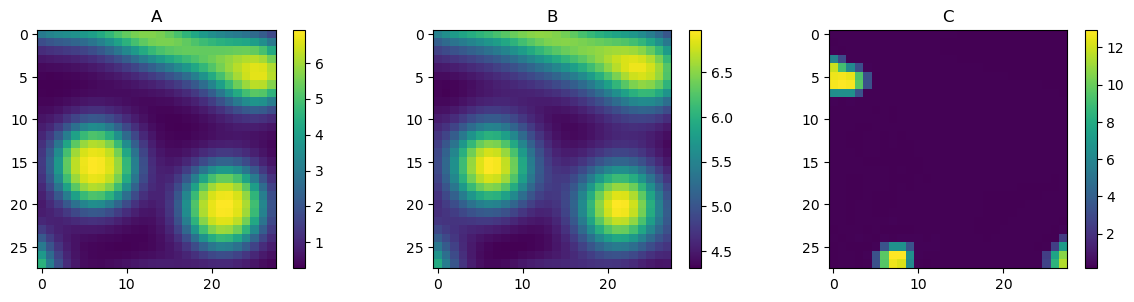

Epoch: 12000 
 data loss:0.050954, 
data A loss:0.027677, data B loss:0.011142, data C loss:0.012136, 
Laplacian A loss:0.102413, Laplacian B loss:0.086988
Physics loss:0.594037
Negative loss:0.000000

 b_A=-0.0632, b_B=3.7923, b_C=0.1215, V_A=24.0229, V_B=93.8042, V_C=10.2237, mu_A=0.4455, mu_B=3.6159, K_AA=4.9871, K_AB=4.9208, K_AC=13.9872, K_BA=4.9014, K_BC=4.7805, K_CB=28.4207, K_CC=5.8078


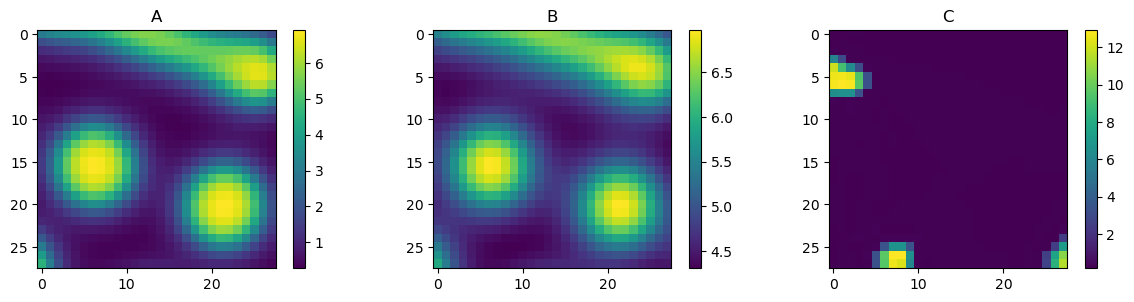

Epoch: 13000 
 data loss:0.058388, 
data A loss:0.027138, data B loss:0.012003, data C loss:0.019247, 
Laplacian A loss:0.162445, Laplacian B loss:0.090482
Physics loss:0.607511
Negative loss:0.000000

 b_A=-0.0676, b_B=3.8132, b_C=0.1166, V_A=24.1558, V_B=93.8249, V_C=10.2849, mu_A=0.4441, mu_B=3.6183, K_AA=4.9967, K_AB=4.9193, K_AC=13.9978, K_BA=4.8889, K_BC=4.7620, K_CB=28.4780, K_CC=5.8129


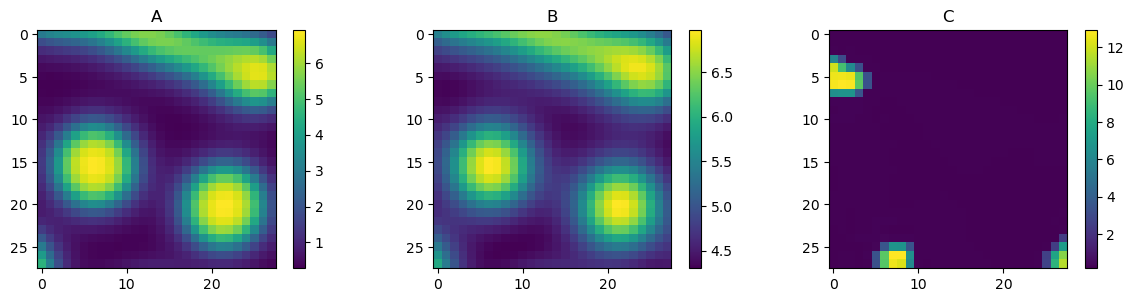

Epoch: 14000 
 data loss:0.047847, 
data A loss:0.026745, data B loss:0.013288, data C loss:0.007814, 
Laplacian A loss:0.142725, Laplacian B loss:0.093348
Physics loss:0.619245
Negative loss:0.000000

 b_A=-0.0563, b_B=3.8200, b_C=0.1262, V_A=24.2611, V_B=93.8361, V_C=10.3728, mu_A=0.4407, mu_B=3.6182, K_AA=4.9877, K_AB=4.9184, K_AC=14.0085, K_BA=4.8916, K_BC=4.7472, K_CB=28.5342, K_CC=5.8038


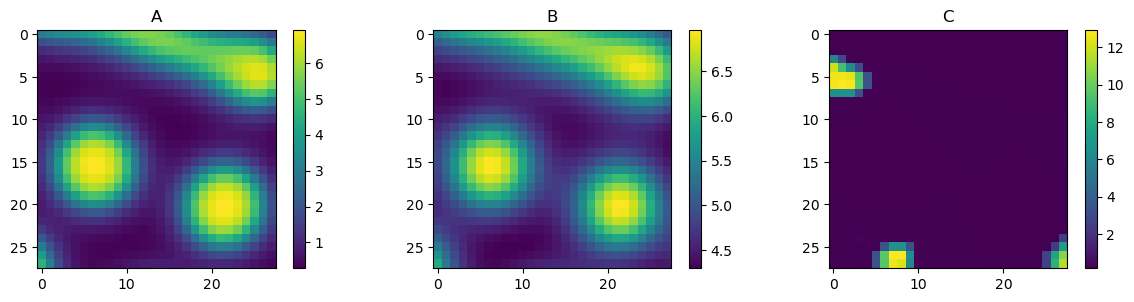

Epoch: 15000 
 data loss:0.043457, 
data A loss:0.026220, data B loss:0.010464, data C loss:0.006772, 
Laplacian A loss:0.096457, Laplacian B loss:0.072639
Physics loss:0.578769
Negative loss:0.000000

 b_A=-0.0676, b_B=3.8201, b_C=0.1230, V_A=24.3229, V_B=93.8414, V_C=10.4466, mu_A=0.4460, mu_B=3.6243, K_AA=4.9974, K_AB=4.9232, K_AC=14.0192, K_BA=4.8800, K_BC=4.7191, K_CB=28.5880, K_CC=5.8064


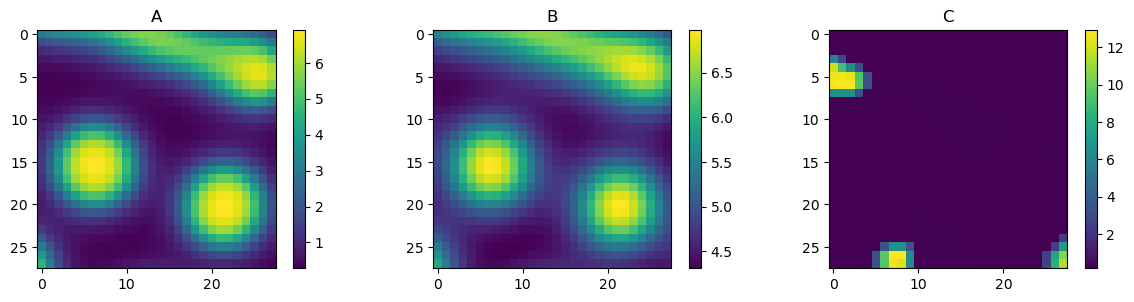

Epoch: 16000 
 data loss:0.041422, 
data A loss:0.025914, data B loss:0.009469, data C loss:0.006039, 
Laplacian A loss:0.093289, Laplacian B loss:0.068214
Physics loss:0.582513
Negative loss:0.000000

 b_A=-0.0622, b_B=3.8242, b_C=0.1238, V_A=24.3703, V_B=93.8505, V_C=10.5324, mu_A=0.4448, mu_B=3.6224, K_AA=4.9933, K_AB=4.9209, K_AC=14.0299, K_BA=4.8812, K_BC=4.6980, K_CB=28.6401, K_CC=5.8014


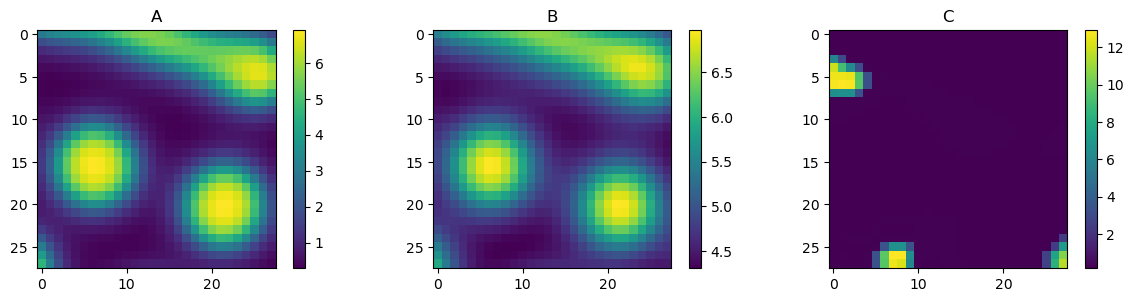

Epoch: 17000 
 data loss:0.041136, 
data A loss:0.025864, data B loss:0.009761, data C loss:0.005511, 
Laplacian A loss:0.114863, Laplacian B loss:0.065447
Physics loss:0.576849
Negative loss:0.000000

 b_A=-0.0676, b_B=3.8195, b_C=0.1229, V_A=24.3927, V_B=93.8525, V_C=10.5906, mu_A=0.4478, mu_B=3.6239, K_AA=4.9941, K_AB=4.9239, K_AC=14.0405, K_BA=4.8789, K_BC=4.6798, K_CB=28.6920, K_CC=5.7987


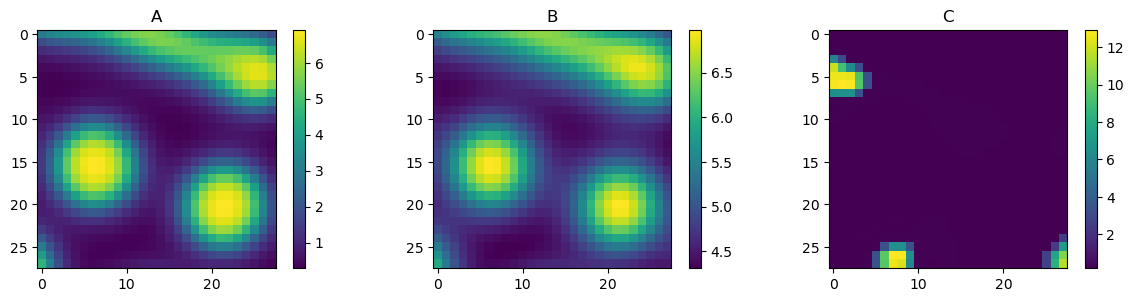

Epoch: 18000 
 data loss:0.043772, 
data A loss:0.025491, data B loss:0.009096, data C loss:0.009185, 
Laplacian A loss:0.089819, Laplacian B loss:0.063558
Physics loss:0.585912
Negative loss:0.000000

 b_A=-0.0607, b_B=3.8242, b_C=0.1279, V_A=24.4132, V_B=93.8632, V_C=10.6862, mu_A=0.4441, mu_B=3.6195, K_AA=4.9898, K_AB=4.9182, K_AC=14.0511, K_BA=4.8823, K_BC=4.6610, K_CB=28.7439, K_CC=5.7893


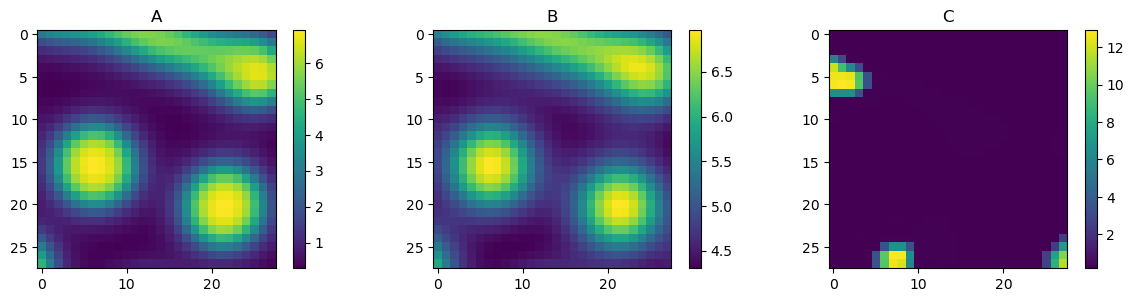

Epoch: 19000 
 data loss:0.040525, 
data A loss:0.025596, data B loss:0.010072, data C loss:0.004857, 
Laplacian A loss:0.136734, Laplacian B loss:0.065890
Physics loss:0.584894
Negative loss:0.000000

 b_A=-0.0710, b_B=3.8227, b_C=0.1248, V_A=24.4140, V_B=93.8630, V_C=10.7474, mu_A=0.4441, mu_B=3.6238, K_AA=5.0011, K_AB=4.9236, K_AC=14.0617, K_BA=4.8743, K_BC=4.6424, K_CB=28.7935, K_CC=5.7869


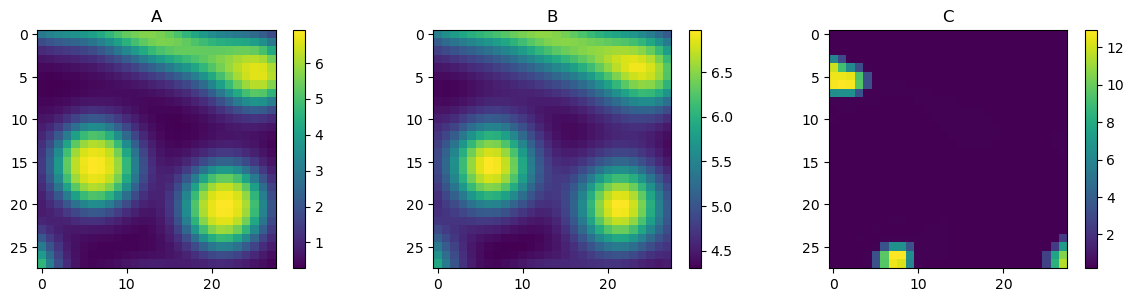

Epoch: 20000 
 data loss:0.038176, 
data A loss:0.025122, data B loss:0.008545, data C loss:0.004509, 
Laplacian A loss:0.067742, Laplacian B loss:0.056834
Physics loss:0.571416
Negative loss:0.000000

 b_A=-0.0627, b_B=3.8315, b_C=0.1234, V_A=24.4281, V_B=93.8706, V_C=10.8286, mu_A=0.4451, mu_B=3.6240, K_AA=4.9946, K_AB=4.9212, K_AC=14.0722, K_BA=4.8777, K_BC=4.6201, K_CB=28.8423, K_CC=5.7856


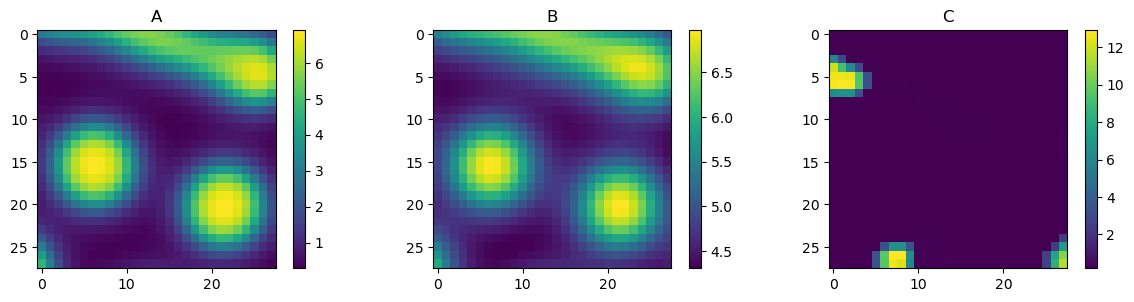

Epoch: 21000 
 data loss:0.040751, 
data A loss:0.025054, data B loss:0.009444, data C loss:0.006253, 
Laplacian A loss:0.072379, Laplacian B loss:0.063265
Physics loss:0.576013
Negative loss:0.000000

 b_A=-0.0599, b_B=3.8309, b_C=0.1251, V_A=24.4214, V_B=93.8744, V_C=10.8868, mu_A=0.4423, mu_B=3.6224, K_AA=4.9937, K_AB=4.9201, K_AC=14.0827, K_BA=4.8796, K_BC=4.6079, K_CB=28.8902, K_CC=5.7795


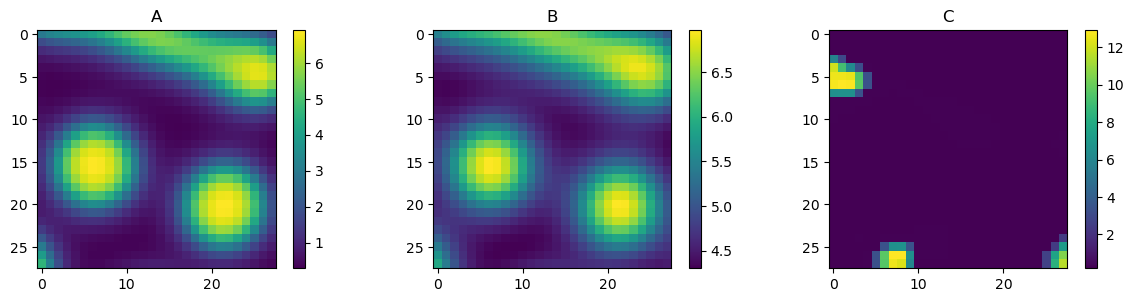

Epoch: 22000 
 data loss:0.037421, 
data A loss:0.024937, data B loss:0.008424, data C loss:0.004059, 
Laplacian A loss:0.082830, Laplacian B loss:0.053482
Physics loss:0.569670
Negative loss:0.000000

 b_A=-0.0645, b_B=3.8279, b_C=0.1231, V_A=24.4126, V_B=93.8736, V_C=10.9385, mu_A=0.4465, mu_B=3.6246, K_AA=4.9954, K_AB=4.9225, K_AC=14.0932, K_BA=4.8775, K_BC=4.5925, K_CB=28.9362, K_CC=5.7784


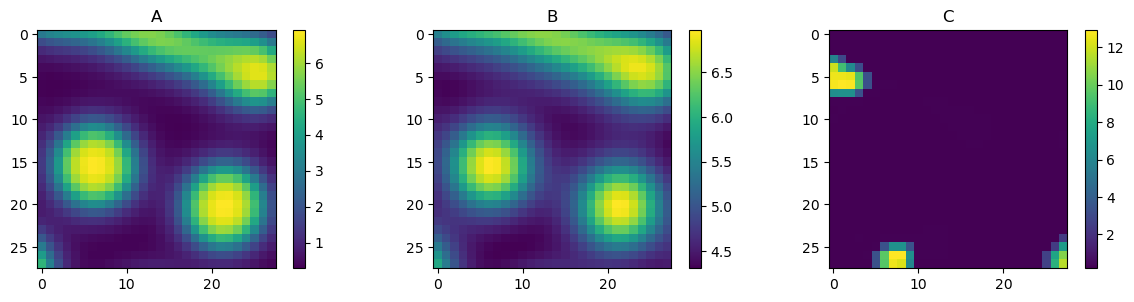

Epoch: 23000 
 data loss:0.041179, 
data A loss:0.025105, data B loss:0.012201, data C loss:0.003873, 
Laplacian A loss:0.185807, Laplacian B loss:0.074009
Physics loss:0.572290
Negative loss:0.000000

 b_A=-0.0710, b_B=3.8294, b_C=0.1204, V_A=24.3984, V_B=93.8746, V_C=11.0015, mu_A=0.4471, mu_B=3.6274, K_AA=5.0038, K_AB=4.9251, K_AC=14.1037, K_BA=4.8716, K_BC=4.5718, K_CB=28.9855, K_CC=5.7788


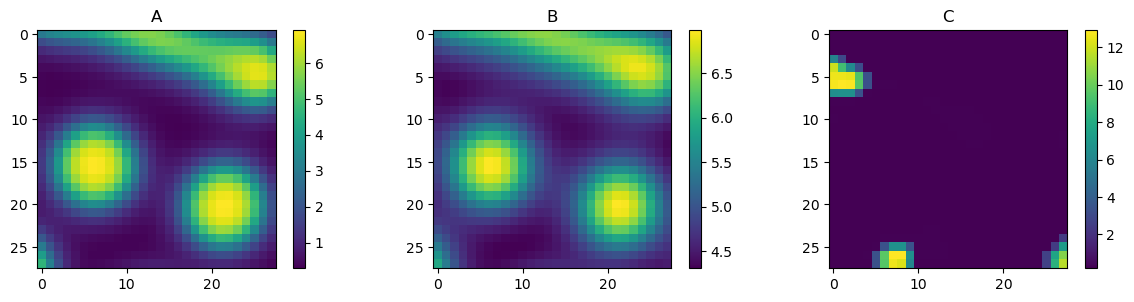

Epoch: 24000 
 data loss:0.049327, 
data A loss:0.024751, data B loss:0.008041, data C loss:0.016535, 
Laplacian A loss:0.074785, Laplacian B loss:0.050399
Physics loss:0.567333
Negative loss:0.000000

 b_A=-0.0631, b_B=3.8324, b_C=0.1224, V_A=24.3941, V_B=93.8799, V_C=11.0563, mu_A=0.4451, mu_B=3.6244, K_AA=4.9951, K_AB=4.9215, K_AC=14.1142, K_BA=4.8790, K_BC=4.5653, K_CB=29.0325, K_CC=5.7710


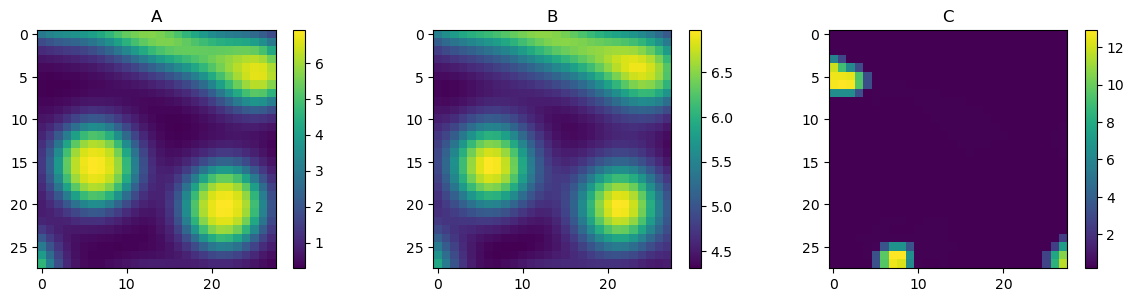

Epoch: 25000 
 data loss:0.053162, 
data A loss:0.024690, data B loss:0.008834, data C loss:0.019638, 
Laplacian A loss:0.057635, Laplacian B loss:0.057997
Physics loss:0.570525
Negative loss:0.000000

 b_A=-0.0604, b_B=3.8378, b_C=0.1212, V_A=24.3885, V_B=93.8840, V_C=11.1035, mu_A=0.4432, mu_B=3.6243, K_AA=4.9922, K_AB=4.9204, K_AC=14.1246, K_BA=4.8819, K_BC=4.5535, K_CB=29.0769, K_CC=5.7684


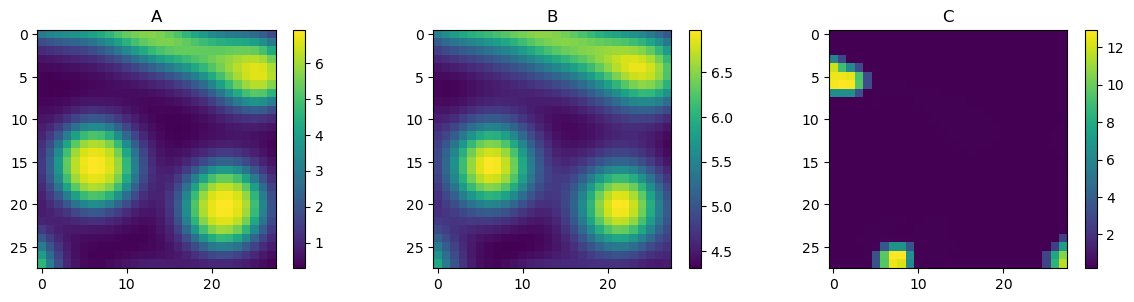

Epoch: 26000 
 data loss:0.037049, 
data A loss:0.024693, data B loss:0.008948, data C loss:0.003409, 
Laplacian A loss:0.061184, Laplacian B loss:0.057960
Physics loss:0.571481
Negative loss:0.000000

 b_A=-0.0667, b_B=3.8358, b_C=0.1234, V_A=24.3732, V_B=93.8828, V_C=11.1443, mu_A=0.4478, mu_B=3.6275, K_AA=4.9964, K_AB=4.9235, K_AC=14.1351, K_BA=4.8781, K_BC=4.5444, K_CB=29.1222, K_CC=5.7652


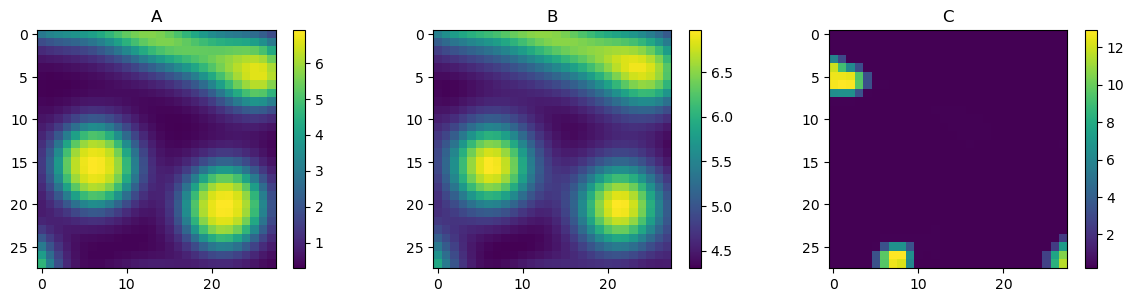

Epoch: 27000 
 data loss:0.036155, 
data A loss:0.024606, data B loss:0.008246, data C loss:0.003303, 
Laplacian A loss:0.067148, Laplacian B loss:0.051128
Physics loss:0.574314
Negative loss:0.000000

 b_A=-0.0604, b_B=3.8375, b_C=0.1238, V_A=24.3624, V_B=93.8866, V_C=11.1852, mu_A=0.4428, mu_B=3.6235, K_AA=4.9928, K_AB=4.9199, K_AC=14.1456, K_BA=4.8829, K_BC=4.5360, K_CB=29.1663, K_CC=5.7612


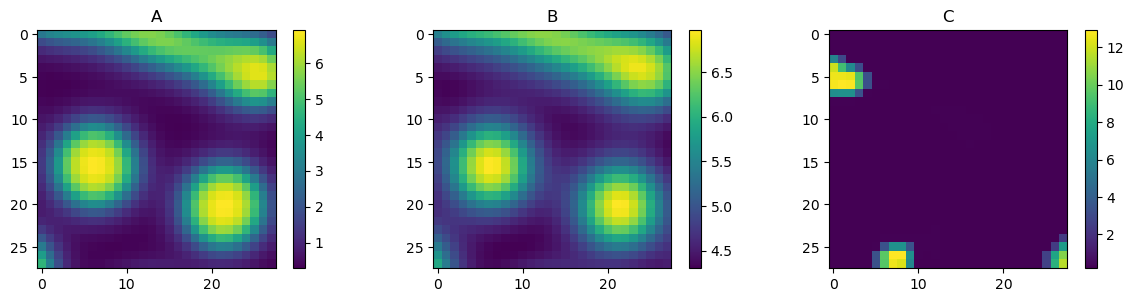

Epoch: 28000 
 data loss:0.035722, 
data A loss:0.024615, data B loss:0.007940, data C loss:0.003167, 
Laplacian A loss:0.075223, Laplacian B loss:0.046470
Physics loss:0.569024
Negative loss:0.000000

 b_A=-0.0641, b_B=3.8349, b_C=0.1226, V_A=24.3487, V_B=93.8846, V_C=11.2300, mu_A=0.4462, mu_B=3.6266, K_AA=4.9944, K_AB=4.9229, K_AC=14.1560, K_BA=4.8812, K_BC=4.5235, K_CB=29.2095, K_CC=5.7608


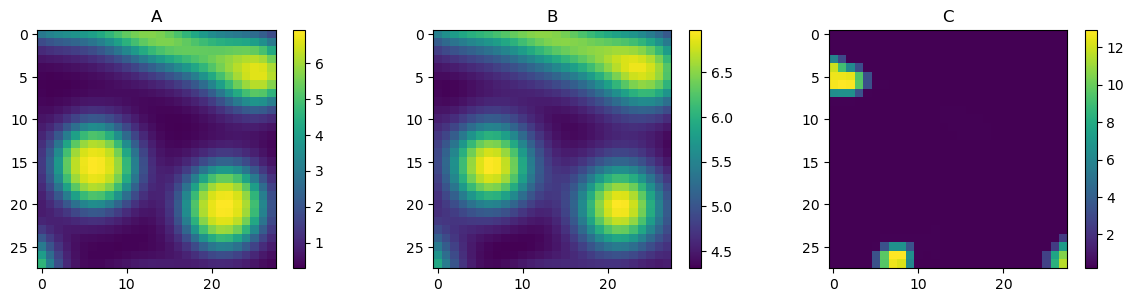

Epoch: 29000 
 data loss:0.036340, 
data A loss:0.024505, data B loss:0.008671, data C loss:0.003164, 
Laplacian A loss:0.063602, Laplacian B loss:0.057326
Physics loss:0.557114
Negative loss:0.000000

 b_A=-0.0620, b_B=3.8343, b_C=0.1240, V_A=24.3358, V_B=93.8862, V_C=11.2688, mu_A=0.4446, mu_B=3.6249, K_AA=4.9933, K_AB=4.9214, K_AC=14.1664, K_BA=4.8831, K_BC=4.5173, K_CB=29.2529, K_CC=5.7566


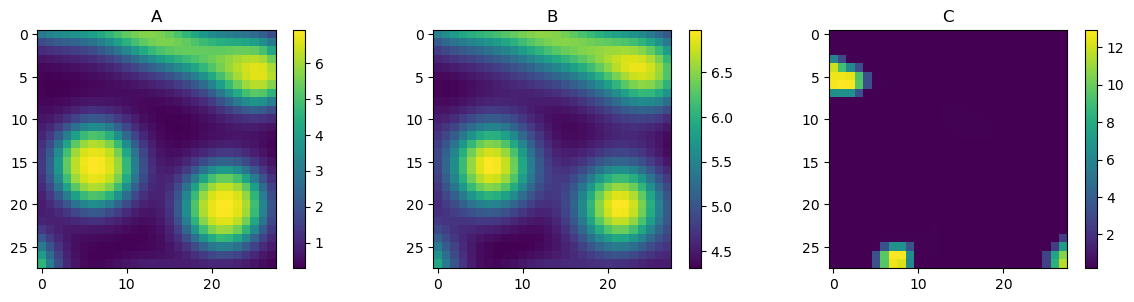

Epoch: 30000 
 data loss:0.036313, 
data A loss:0.024468, data B loss:0.008318, data C loss:0.003528, 
Laplacian A loss:0.059913, Laplacian B loss:0.049346
Physics loss:0.561372
Negative loss:0.000000

 b_A=-0.0629, b_B=3.8339, b_C=0.1219, V_A=24.3217, V_B=93.8864, V_C=11.2919, mu_A=0.4456, mu_B=3.6254, K_AA=4.9932, K_AB=4.9220, K_AC=14.1767, K_BA=4.8835, K_BC=4.5087, K_CB=29.2958, K_CC=5.7563


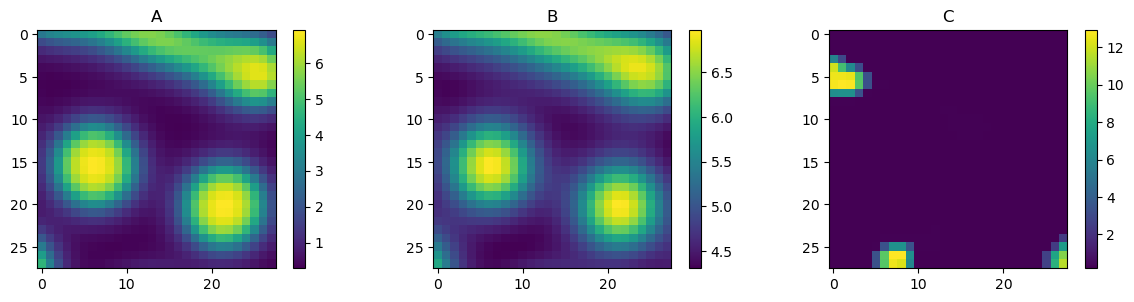

Epoch: 31000 
 data loss:0.035630, 
data A loss:0.024498, data B loss:0.008252, data C loss:0.002880, 
Laplacian A loss:0.077556, Laplacian B loss:0.049187
Physics loss:0.582362
Negative loss:0.000000

 b_A=-0.0608, b_B=3.8411, b_C=0.1238, V_A=24.3209, V_B=93.8917, V_C=11.3284, mu_A=0.4432, mu_B=3.6236, K_AA=4.9905, K_AB=4.9194, K_AC=14.1872, K_BA=4.8862, K_BC=4.5042, K_CB=29.3369, K_CC=5.7522


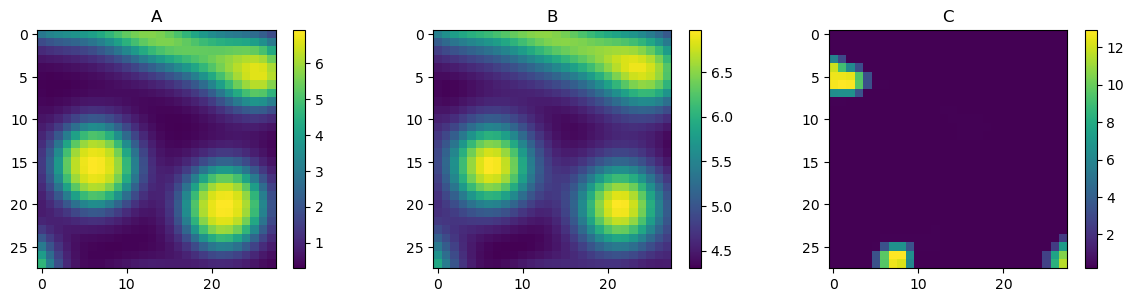

    Early dtoped at 31936
Epoch: 31936 
 data loss:0.035761, 
data A loss:0.024402, data B loss:0.008348, data C loss:0.003012, 
Laplacian A loss:0.058364, Laplacian B loss:0.048885
Physics loss:0.556488
Negative loss:0.000000

 b_A=-0.0641, b_B=3.8381, b_C=0.1230, V_A=24.3056, V_B=93.8890, V_C=11.3591, mu_A=0.4457, mu_B=3.6264, K_AA=4.9937, K_AB=4.9220, K_AC=14.1970, K_BA=4.8839, K_BC=4.4948, K_CB=29.3769, K_CC=5.7516


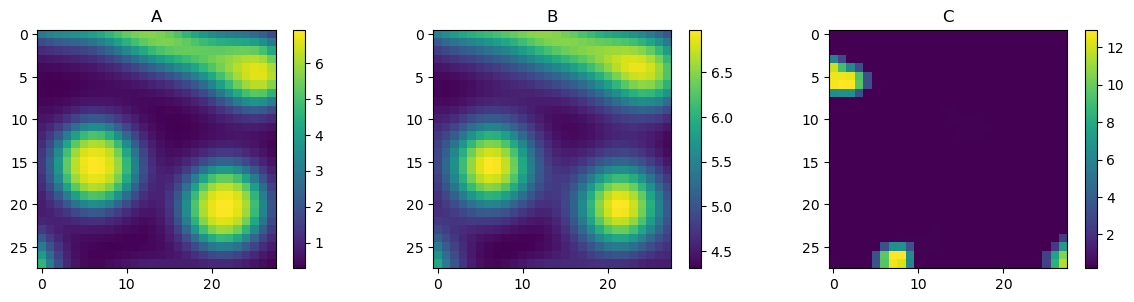

In [6]:
torch.manual_seed(42)
np.random.seed(42)
dtype = torch.float32
torch.set_default_dtype(dtype)

def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str)), []
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str)), []


D_A=params["D_A"]#, sampled_D_A = create_var()
D_B=params["D_B"]#, sampled_D_B = create_var()
b_A, sampled_b_A = create_var(1)
b_B, sampled_b_B = create_var(1)
b_C, sampled_b_C = create_var(1)
V_A, sampled_V_A = create_var(1)
V_B, sampled_V_B = create_var(1)
V_C, sampled_V_C = create_var(1)
mu_A, sampled_mu_A = create_var(1)
mu_B, sampled_mu_B = create_var(1)
mu_C=params["mu_C"]#, sampled_mu_C = create_var()
K_AA, sampled_K_AA = create_var(K_AA_init)
K_AB, sampled_K_AB = create_var(K_AB_init)
K_AC, sampled_K_AC = create_var(K_AC_init)
K_BA, sampled_K_BA = create_var(K_BA_init)
K_BC, sampled_K_BC = create_var(K_BC_init)
K_CB, sampled_K_CB = create_var(K_CB_init)
K_CC, sampled_K_CC = create_var(K_CC_init)
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

params_sampled_list =[#sampled_D_A, sampled_D_B,
                      sampled_b_A, sampled_b_B, sampled_b_C, sampled_V_A, sampled_V_B, sampled_V_C,
                      sampled_mu_A, sampled_mu_B, #sampled_mu_C,
                      sampled_K_AA, sampled_K_AB, sampled_K_AC, sampled_K_BA, sampled_K_BC,
                      sampled_K_CB, sampled_K_CC
                     ]

###########################################################
# Inputs
# restrict to inner boundaries
x = torch.linspace(0, run_params.Lx, run_params.Ix)[x_slice].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[y_slice].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)

def transform(x, l, u):
    return (u-l)*x + l

x2 = transform(torch.rand(run_params.Ix),torch.min(x).item(),torch.max(x).item())
y2 = transform(torch.rand(run_params.Jy),torch.min(y).item(),torch.max(y).item())
X2,Y2 = torch.meshgrid(x2, y2, indexing='ij')
physics_X = torch.vstack([X2.flatten(), Y2.flatten()]).T.requires_grad_(True).to(device)
##########################################################
#   Data
# restrict to inner boundaries
data_A = torch.from_numpy(A_n[x_slice,y_slice].flatten()).to(device)
data_B = torch.from_numpy(B_n[x_slice,y_slice].flatten()).to(device)
data_C = torch.from_numpy(C_n[x_slice,y_slice].flatten()).to(device)
###########################################################
# Laplacians
# First, find the finite-diff Laplacian on the whole domain,
# then, select the inner boundaries. This way, the boundaries 
# effets removed
diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA = torch.tensor(laplacianA[x_slice,y_slice].flatten()).to(device)
laplacianB = torch.tensor(laplacianB[x_slice,y_slice].flatten()).to(device)
###########################################################
zeors_tensor = torch.zeros(data_X.shape[0]).to(device)
###########################################################
# Model
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_sep_dense_normalised(2,3,[128,128,128,128], lb, ub).to(device)
###########################################################
# optimizer
optimizer = torch.optim.Adam([{'params': model.parameters(), 'lr': 1e-4},
                              {'params': params_list, 'lr': .1}]
                              , lr=1e-4)#.LBFGS([*model.parameters(), *params_list], lr=1
                             #,line_search_fn='strong_wolfe')#


epochs = 30000
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics = 1e-4
loss_laplacian_physics = 0.0
lambda_physics_laplacian = 1e-2
loss_negative = 0
lambda_negative = 100

losses = np.zeros((7, epochs+6000))
last_loss = np.inf

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return km**n / (x**n + km**n)

for i in range(epochs +6000): 
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3
        #################################
        loss_negative = torch.mean(torch.maximum(-data_A_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_B_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_C_hat, zeors_tensor)**2
                       )
        #################################
        # Laplacians derivatives        
        laplacianA_hat = Laplacian(data_A_hat, data_X)
        laplacianB_hat = Laplacian(data_B_hat, data_X)
        
        A_loss_laplacian = torch.mean((laplacianA_hat-laplacianA)**2)
        B_loss_laplacian = torch.mean((laplacianB_hat-laplacianB)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        # physics derivatives  
        physics_f_hat = model(physics_X)
        A = physics_f_hat[0].squeeze() 
        B = physics_f_hat[1].squeeze() 
        C = physics_f_hat[2].squeeze() 
        
        laplacianA_hat = Laplacian(A, physics_X)
        laplacianB_hat = Laplacian(B, physics_X)
        
        F_A =  b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - mu_A * A    
        F_B =  b_B + V_B*act(A, K_AB, n)*inh(C, K_CB, n) - mu_B * B        
        F_C =  b_C + V_C*inh(A, K_AC, n)*inh(B, K_BC, n)*act(C, K_CC, n) - mu_C * C        

        dAdt = D_A * laplacianA_hat + F_A
        dBdt = D_B * laplacianB_hat + F_B
        dCdt = F_C
        ################################
        # physics loss
        # Construct the physics loss here
        A_loss_physics = torch.mean(dAdt**2)
        B_loss_physics = torch.mean(dBdt**2)
        C_loss_physics = torch.mean(dCdt**2)
        loss_physics = (A_loss_physics  
                        + B_loss_physics 
                        + C_loss_physics)
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
            +lambda_physics*loss_physics
            #+lambda_negative*loss_negative
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item(),
                       loss_physics.item(), loss_negative.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
    
    def show_outputs(i):
        ls = np.sqrt(losses[:, i])
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
              f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
              f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
              f"Physics loss:{ls[5]:.6f}\n"
              f"Negative loss:{ls[6]:.6f}\n"
              f"\n"
              ,
              ", ".join([f"{name}={param.item():.4f}" for param, name in zip(params_list, params_name_list)])
             )
        data_f_hat = model(data_X)        
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()
       
    
    if i < epochs and last_loss > np.sum(losses[:,i]):
        last_loss =  np.sum(losses[:,i])
            
    elif np.sum(losses[:,i]) < last_loss:
        print("============================================")
        print(f"    Early dtoped at {i+1}")
        print("============================================")
        show_outputs(i)
        early_stop = True
        with torch.no_grad():
            for i,(param, name) in enumerate(zip(params_list, params_name_list)):
                l,u = get_bound(name)
                param[:] = param.clamp(l,u)
                params_sampled_list[i].append(param.item())
        break        
    
    if (i+1)%1000 == 0 or i==0:        
        show_outputs(i)
        
    with torch.no_grad():
        for i,(param, name) in enumerate(zip(params_list, params_name_list)):
            l,u = get_bound(name)
            param[:] = param.clamp(l,u)
            params_sampled_list[i].append(param.item())
            


# Plot the trained outputs

A RMSE:0.024390566003416367 B RMSE:0.008097997530577628 C RMSE:0.0028980889733188665
F_A actual:0.5416853390991865, F_A:0.536768913269043, RMSE: 0.014734203700536798
F_B actual:476.0016768708527, F_B:467.25494384765625, RMSE: 0.31489859379793267
F_C actual:0.3549702247494855, F_C:0.3517063558101654, RMSE: 0.014709491437879904

Laplacian A RMSE: 0.05277825427715403
Laplacian B RMSE: 0.047544138400074966

dAdt RMSE: 0.01477350234933281
dBdt RMSE: 0.3267469056401271
dCdt RMSE: 0.014709491437879904


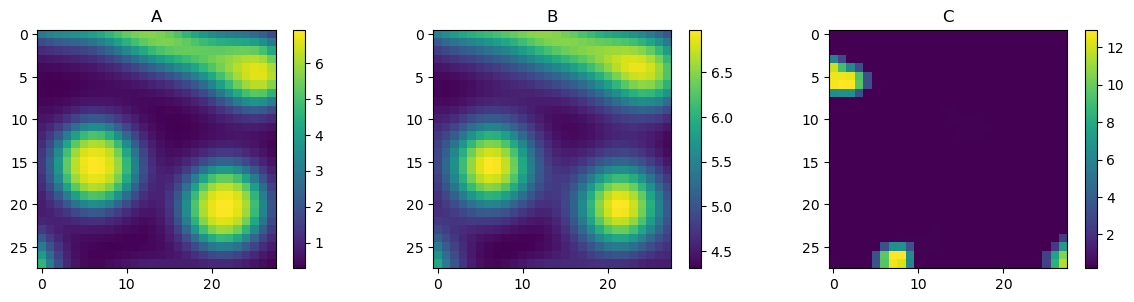

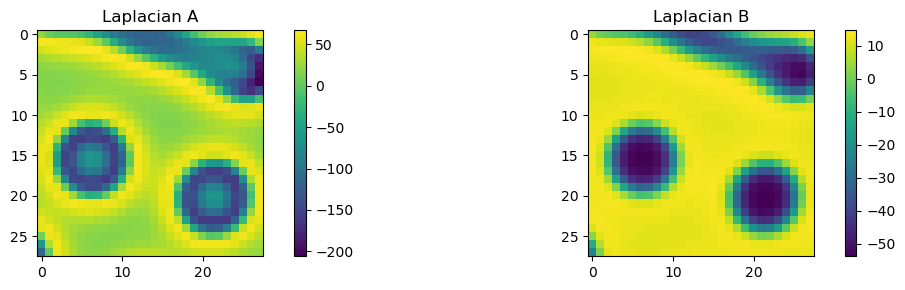

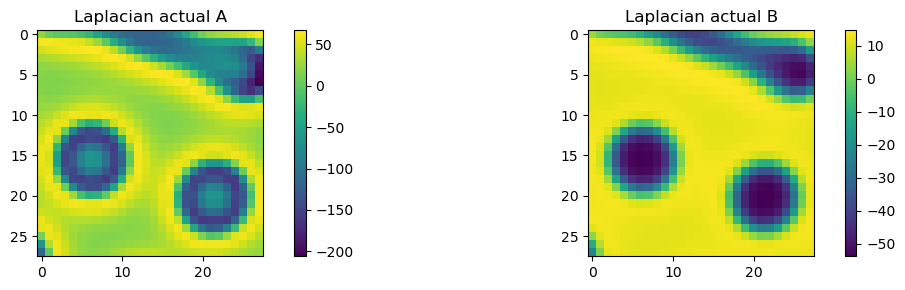

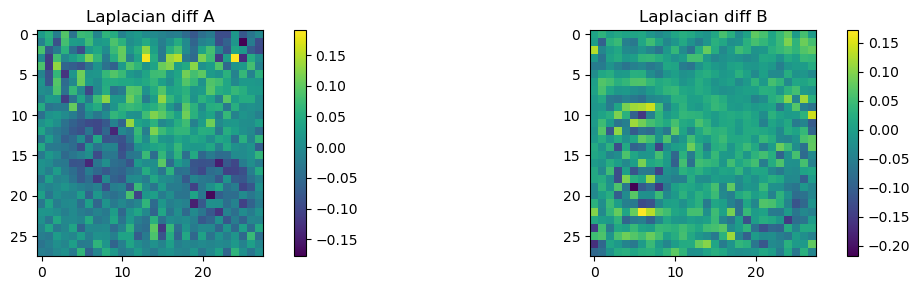

In [7]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = Laplacian(A_hat, data_X)
laplacianB_hat = Laplacian(B_hat, data_X)

A_hat = to(A_hat.cpu().detach().numpy())
B_hat = to(B_hat.cpu().detach().numpy())
C_hat = to(C_hat.cpu().detach().numpy())
laplacianA_hat = to(laplacianA_hat.cpu().detach().numpy())
laplacianB_hat = to(laplacianB_hat.cpu().detach().numpy())


laplacianA = diffusion_scale_factor * grad_diff(A_n)[x_slice,y_slice]
laplacianB = diffusion_scale_factor * grad_diff(B_n)[x_slice,y_slice]

n = params["n"]

A = A_n[x_slice,y_slice]
B = B_n[x_slice,y_slice]
C = C_n[x_slice,y_slice]

F_A =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_A_hat =  params["b_A"] + params["V_A"]*act(A_hat, params["K_AA"], n)*inh(B_hat, params["K_BA"], n) - params["mu_A"] * A_hat
F_B =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B
F_B_hat =  params["b_B"] + params["V_B"]*act(A_hat, params["K_AB"], n)*inh(C_hat, params["K_CB"], n) - params["mu_B"] * B_hat
F_C =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_C_hat =  params["b_C"] + params["V_C"]*inh(A_hat, params["K_AC"], n)*inh(B_hat, params["K_BC"], n)*act(C_hat, params["K_CC"], n) - params["mu_C"] * C_hat


dAdt = params["D_A"]*laplacianA + F_A
dAdt_hat = params["D_A"]*laplacianA_hat + F_A_hat
dBdt = params["D_B"]*laplacianB + F_B
dBdt_hat = params["D_B"]*laplacianB_hat + F_B_hat

print(f"A RMSE:{np.sqrt(np.mean((A_hat-A)**2))}",
      f"B RMSE:{np.sqrt(np.mean((B_hat-B)**2))}",
      f"C RMSE:{np.sqrt(np.mean((C_hat-C)**2))}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A_hat**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A_hat)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B_hat**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B_hat)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C_hat**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C_hat)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA_hat-laplacianA)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB_hat-laplacianB)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt-dAdt_hat)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt-dBdt_hat)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C_hat)**2))}")

plot_n_im([A_hat, B_hat, C_hat], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA_hat, laplacianB_hat], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA, laplacianB], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA_hat-laplacianA, laplacianB_hat-laplacianB], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()



# Plot losses

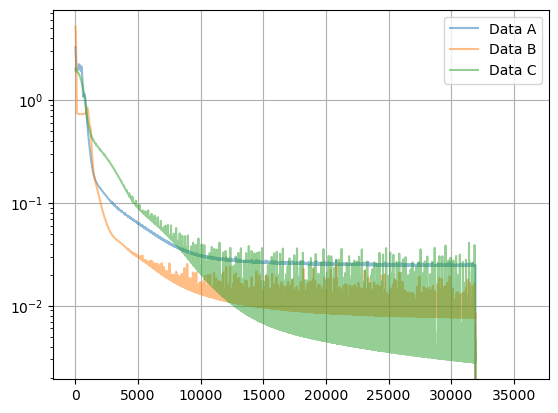

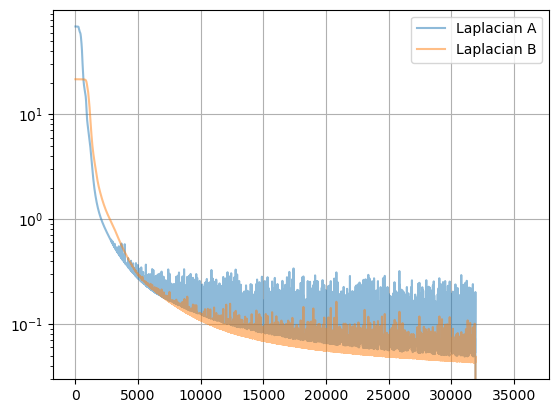

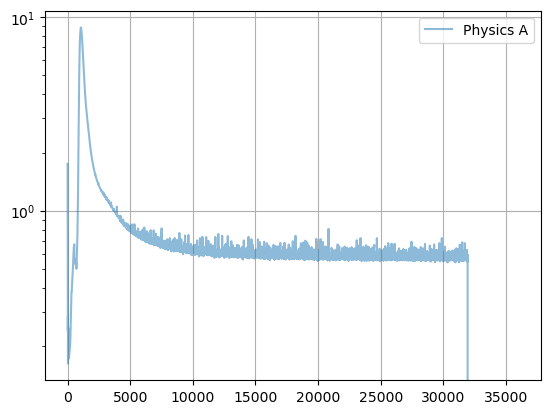

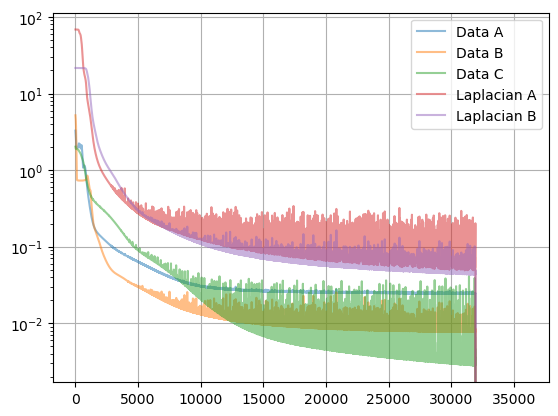

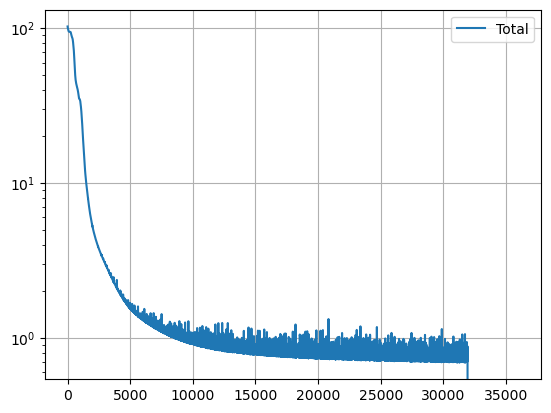

In [8]:
ls= np.sqrt(losses)
plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[5,:], alpha=.5, label="Physics A")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()

plt.plot(np.sum(ls, axis=0), label="Total")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


# Plot the trained Field and its difference

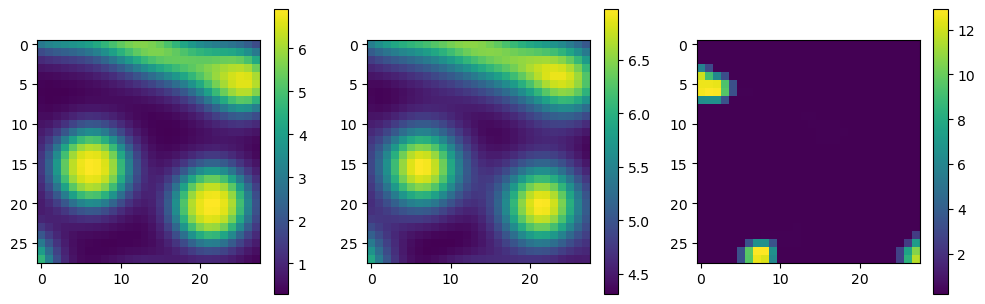

In [9]:
solution_hat = model(data_X)
A_hat = to(solution_hat[0].cpu().detach().numpy())
B_hat = to(solution_hat[1].cpu().detach().numpy())
C_hat = to(solution_hat[2].cpu().detach().numpy())
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

0.024390566003416367
0.008097997530577628
0.0028980889733188665


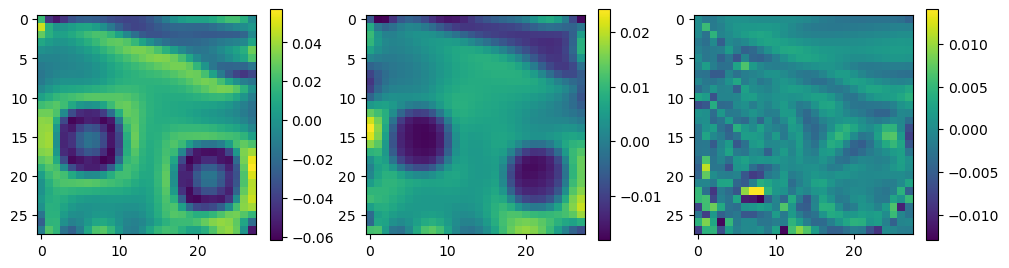

In [10]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A)
print(np.sqrt(np.mean((A_hat-A)**2)))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B)
print(np.sqrt(np.mean((B_hat-B)**2)))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C)
print(np.sqrt(np.mean((C_hat-C)**2)))
plt.colorbar(shrink=.75)
plt.show()


# Second optimisation
## Find the parameters

In [11]:
estimated_params = dict()
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = l.item()

In [12]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEst. \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"                                  
                  f"{estimated_params[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Est. 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.000		nan		(nan,nan)
b_B:	10.000		3.838		nan		(nan,nan)
b_C:	0.100		0.123		nan		(nan,nan)
V_A:	25.000		24.306		nan		(nan,nan)
V_B:	100.000		93.889		nan		(nan,nan)
V_C:	10.000		11.359		nan		(nan,nan)
mu_A:	0.500		0.446		nan		(nan,nan)
mu_B:	5.000		3.626		nan		(nan,nan)
K_AA:	5.000		4.994		0.040		(0.040,26.390)
K_AB:	5.000		4.922		0.040		(0.040,26.390)
K_AC:	1.000		14.197		26.390		(0.040,26.390)
K_BA:	5.000		4.884		1.073		(1.073,26.710)
K_BC:	5.000		4.495		1.073		(1.073,26.710)
K_CB:	50.000		29.377		53.553		(0.053,53.553)
K_CC:	1.000		5.752		0.053		(0.053,53.553)


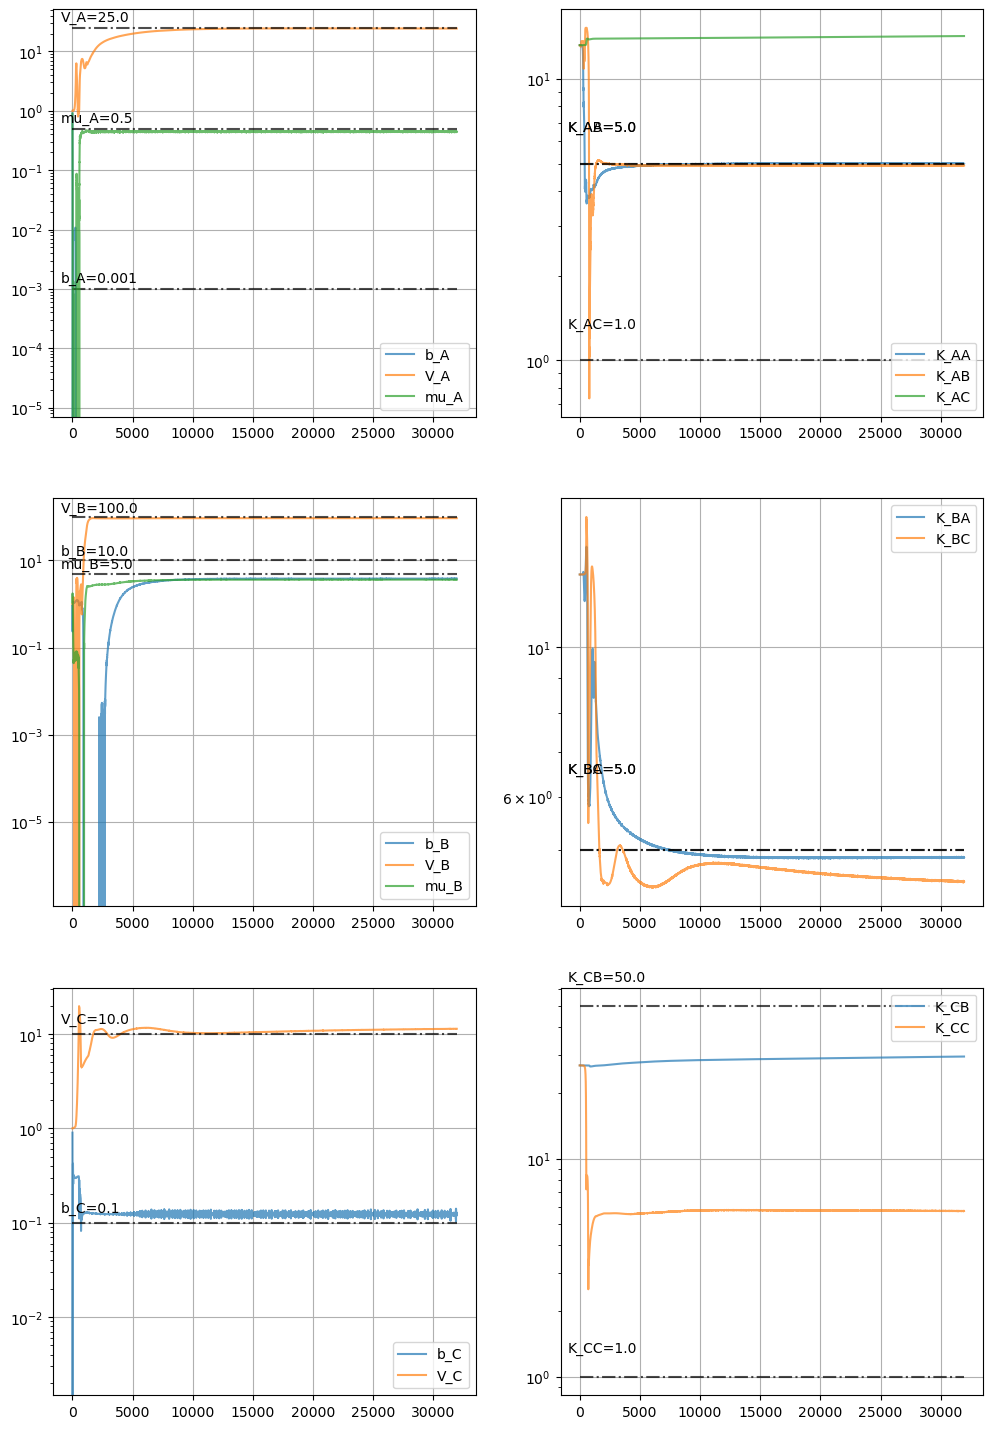

In [18]:
def plot_params(ax, names):    
    for i,(param, name) in enumerate(zip(params_list, params_name_list)):    
        if name not in names:
            continue
        ax.plot(params_sampled_list[i], label=f"{name}", alpha=.7)
        ax.hlines(params[name], 0, len(params_sampled_list[i]), 
                   linestyles='-.', alpha=.7, color='black')
        ax.text(-1000, 1.3*params[name], f"{name}={params[name]}")
    plt.yscale('log');plt.legend();plt.grid()   
    
_ = plt.figure(figsize=(12,18))
plot_params(plt.subplot(321), ["b_A", "mu_A", "V_A"])
plot_params(plt.subplot(322), ["K_AA","K_AB","K_AC"])
plot_params(plt.subplot(323), ["b_B", "mu_B", "V_B"])
plot_params(plt.subplot(324), ["K_BA","K_BC"])
plot_params(plt.subplot(325), ["b_C", "mu_C", "V_C"])
plot_params(plt.subplot(326), ["K_CB","K_CC"])

In [17]:
import pickle

torch.save(model, "./06_outputs/model_PINN_60")
torch.save(model.state_dict(), "./06_outputs/model_PINN_state_60")
with open('./06_outputs/model_PINN_params_name_list_60.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./06_outputs/model_PINN_losses_60.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./06_outputs/model_PINN_estimated_params_60.pkl", "wb") as f:
    pickle.dump((dict(params),  dict(estimated_params)), f)
with open(f"./06_outputs/model_PINN_estimated_params_list_60.pkl", "wb") as f:
    pickle.dump(params_sampled_list, f)     

In [14]:
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import RD_2D_1st_Order, Neumann_Boundary_2D

D_A, D_B , n, mu_C= 0.01, 1.0, 4, params["mu_C"]
model_integrator = RD_2D_1st_Order(Ds=[D_A, D_B, 0], 
                        delta_t=100/5000, 
                        Lx=10, Ly=10, 
                        Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D)

/end/home/rh2310/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


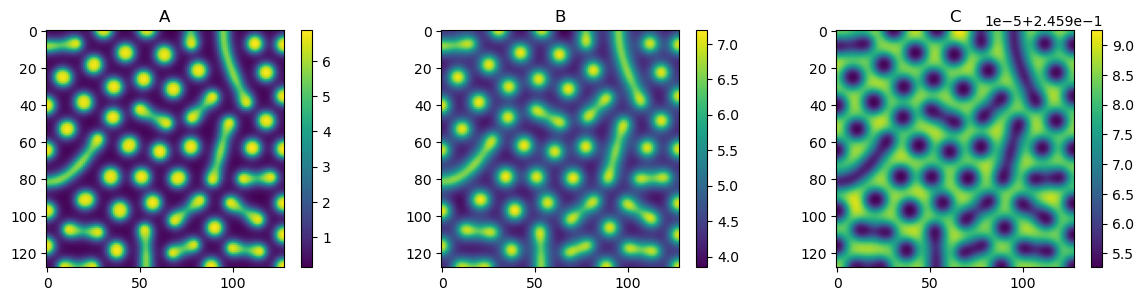

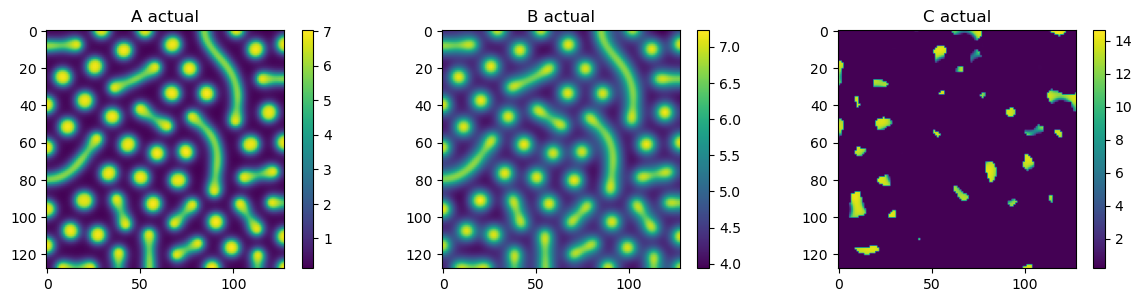

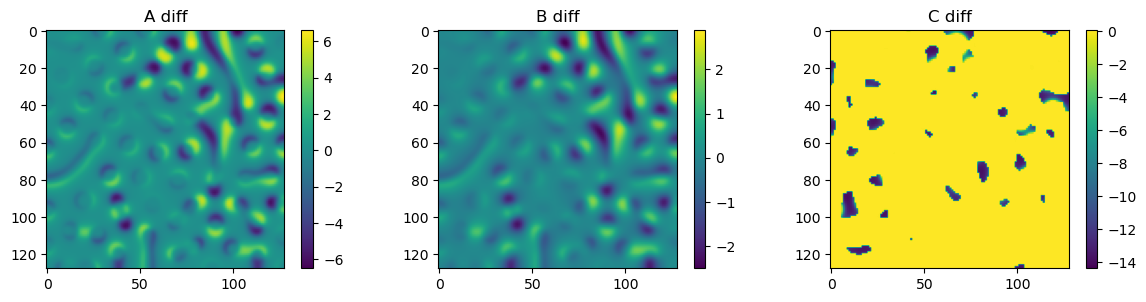

In [15]:

params2 = {}
for k,v in estimated_params.items():
    if not k.startswith("K"):
        params2[k] = v
    else:
        lower, upper = Ks_bounds[k]
        if v < lower:
            params2[k] = lower
        elif v > upper:
            params2[k] = upper
        else:
            params2[k] = v

kinetics = create_circuit_3954(n,params2["b_A"], params2["mu_A"], params2["V_A"], 
                                       params2["K_AA"], params2["K_AB"], params2["K_AC"],
                                       params2["b_B"], params2["mu_B"], params2["V_B"], 
                                       params2["K_BA"], params2["K_BC"],
                                       params2["b_C"], mu_C, params2["V_C"], 
                                       params2["K_CB"], params2["K_CC"])

(A_init, B_init, C_init) = (solution[0, 0, :, :].flatten(),
                            solution[0, 1, :, :].flatten(),
                            solution[0, 2, :, :].flatten())
solution_test = model_integrator.integrate([A_init, B_init, C_init],kinetics, 4*5000, record_steps=5000)

A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([A_test-solution[105, 0, :, :],
           B_test-solution[105, 1, :, :],
           C_test-solution[105, 2, :, :]], 
           ["A diff","B diff","C diff"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

In [16]:
{1:31,
2:3,
3:9, 
4:25,
5:14,
6:60,
7:24,
8:26,
9:65}

{1: 31, 2: 3, 3: 9, 4: 25, 5: 14, 6: 60, 7: 24, 8: 26, 9: 65}